<a href="https://colab.research.google.com/github/unclepeddy/deeplearning/blob/master/1-imdb-binary-classification/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install tf-nightly-2.0-preview

In [0]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

import matplotlib.pyplot as plt

print(tf.__version__)

In [0]:
# Vocab size
max_words = 10000
# Embedding space dimensions
embedding_input_dim = max_words
embedding_output_dim = 32
# Maximum length of a sentence sequence
maxlen = 500
# Number of units in LSTM layer
lstm_width = 32
# Size of batches to be trained with
batch_size = 32

# Import and preprocess train + test data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
	num_words=max_words)
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)

# Build model: embedding -> lstm -> sigmoid
model = models.Sequential()
model.add(layers.Embedding(embedding_input_dim, embedding_output_dim))
model.add(layers.LSTM(lstm_width))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
# Compile and train model - this may take up to an hour because...LSTMs..
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_data, train_labels, 
	epochs = 1,
	batch_size=batch_size,
	validation_split=0.2)

history_data = history.history

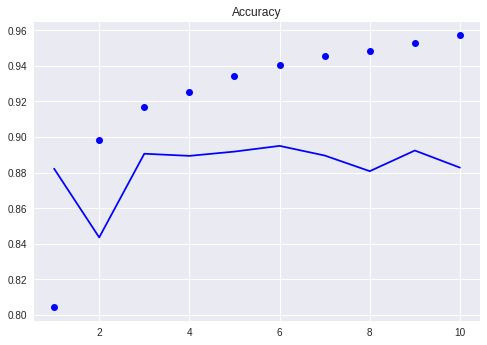

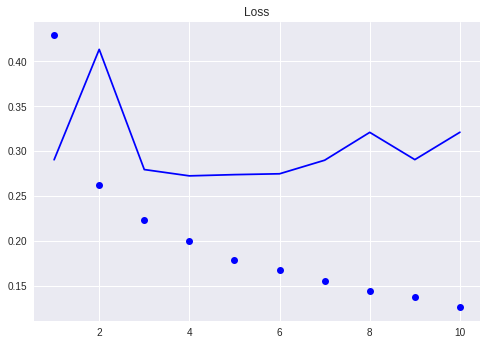

In [19]:
# Capture accuracy and loss for training and validation
acc = history_data['acc']
val_acc = history_data['val_acc']
loss = history_data['loss']
val_loss = history_data['val_loss']


# Make plot for accuracy and loss
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title("Accuracy")
plt.show()

plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title("Loss")
plt.show()

In [20]:
model.evaluate(test_data, test_labels)

25000/25000 [==============================] - 140s 6ms/sample - loss: 0.3508 - acc: 0.8766


[0.3508383814430237, 0.87664]